In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

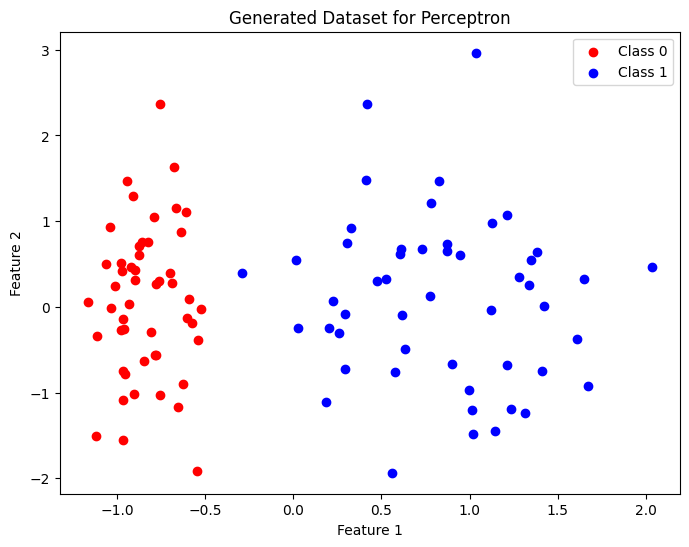

In [ ]:
# Generate a dataset with 2 features
X, y = make_classification(n_samples=100,
                           n_features=2,
                           n_informative=1,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           n_classes=2,
                           random_state=41,class_sep=0.8)
# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title("Generated Dataset for Perceptron")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [ ]:
class PerceptronLearningAlgorithm:
  def __init__(self,learning_rate,epochs):
    self.learning_rate=learning_rate
    self.epochs=epochs
    self.coefficients=None
  def fit(self,X_train,y_train):
    X_train = np.insert(X_train, 0, 1, axis=1)
    #we need to initialize the coefficients and intercept first
    self.coefficients=np.ones(X_train.shape[1])
    #run through the epochs
    for i in range(self.epochs):
      random_index=np.random.randint(0,X_train.shape[0])
      y_pred= 1 if np.dot(X_train[random_index],self.coefficients)>0 else 0
      self.coefficients+=self.learning_rate*(y_train[random_index]-y_pred)*X_train[random_index]
  def predict(self,X_test):
    X_test=np.insert(X_test,0,1,axis=1)
    predicted_labels=[]
    for i in range(X_test.shape[0]):
     predicted_labels.append(1 if np.dot(X_test[i],self.coefficients)>0 else 0)
    return predicted_labels

In [ ]:
from sklearn.metrics import r2_score
perecptron=PerceptronLearningAlgorithm(0.01,1000)
perecptron.fit(X,y)
y_pred=perecptron.predict(X)
print("r2 score of the model is: ",r2_score(y,y_pred))

r2 score of the model is:  1.0


In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))
def perceptron_sigmoid(X,y,epochs,learning_rate):
  X=np.insert(X,0,1,axis=1)
  coefficients=np.ones(X.shape[1])
  for i in range(epochs):
    random_index=np.random.randint(0,X.shape[0])
    y_hat=sigmoid(np.dot(X[random_index],coefficients))
    coefficients=coefficients+learning_rate*(y[random_index]-y_hat)*X[random_index]
  return coefficients[0],coefficients[1:]
w0_sigmoid,coefficients_sigmoid=perceptron_sigmoid(X,y,1000,0.01)

In [ ]:
import math
class PerceptronSigmoid:
  def __init__(self,learning_rate=0.01,epochs=1200):
    self.learning_rate=learning_rate
    self.epochs=epochs
    self.coefficients=None
  def sigmoid(self,X):
    return 1/(1+np.exp(-X))
  def fit(self,X_train,y_train):
    n_features=X_train.shape[1]
    n_samples=X_train.shape[0]
    X_train=np.insert(X_train,0,1,axis=1)
    #initialize the weight and intercepts
    self.coefficients=np.ones(X_train.shape[1])
    #loop through the epochs
    for i in range(self.epochs):
      #select a random point and find the y_pred
      random_index=np.random.randint(0,X_train.shape[0])
      y_pred=self.sigmoid(np.dot(X_train[random_index],self.coefficients))
      self.coefficients+=self.learning_rate*(y_train[random_index]-y_pred)*X_train[random_index]
  def predict(self,X_test):
    X_test=np.insert(X_test,0,1,axis=1)
    predicted=self.sigmoid(np.dot(X_test,self.coefficients))> 0.5
    predicted_values=[]
    for i in predicted:
      if(i):
        predicted_values.append(1)
      else:
        predicted_values.append(0)
    return predicted_values

In [ ]:
ps=PerceptronSigmoid()
ps.fit(X,y)
predicted_values=ps.predict(X)
print("r2 score of the model is : ",r2_score(predicted_values,y))
print(predicted_values)

r2 score of the model is :  0.959983993597439
[1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0]


In [ ]:
class LogisticRegression:
  def __init__(self,learning_rate=0.01,epochs=1000):
    self.learning_rate=learning_rate
    self.epochs=epochs
    self.coefficients=None
  def sigmoid(self,z):
    return 1/(1+np.exp(-z))
  def fit(self,X_train,y_train):
    X_train=np.insert(X_train,0,1,axis=1)
    self.coefficients=np.ones(X_train.shape[1])
    for i in range(self.epochs):
      y_hat=sigmoid(np.dot(X_train,self.coefficients))
      self.coefficients=self.coefficients+(self.learning_rate/X_train.shape[0])*np.dot((y_train-y_hat).T,X_train)
    return self.coefficients
  def predict(self,x_test):
    x_test=np.insert(x_test,0,1,axis=1)
    y_hat=sigmoid(np.dot(x_test,self.coefficients))
    y_predicted=[]
    for i in y_hat:
      if i>=0.5:
        y_predicted.append(1)
      else:
        y_predicted.append(0)
    return y_predicted
l=LogisticRegression()
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
l.fit(X_train,y_train)
y_pred=l.predict(X_test)
print("r2 score of the model is: ",r2_score(y_test,y_pred))

r2 score of the model is:  1.0


r2 score= 1.0


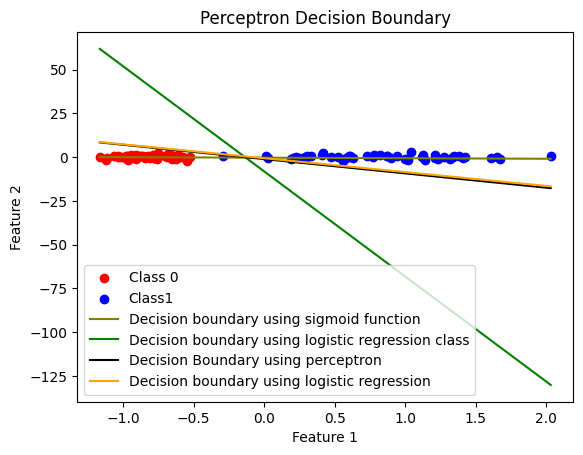

In [ ]:
#using peceptron
slope=-perecptron.coefficients[0]/perecptron.coefficients[1]
intercept=-perecptron.coefficients[0]/perecptron.coefficients[1]
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = slope * x_values + intercept
#classification using the sklearn
from sklearn.linear_model import LogisticRegression
c=LogisticRegression()
c.fit(X,y)
y_pred=c.predict(X_test)
print("r2 score=",r2_score(y_test,y_pred))
slope=-c.coef_[0][0]/c.coef_[0][1]
intercept=-c.intercept_[0]/c.coef_[0][1]
x_values1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values1 = slope * x_values + intercept
#using perceptron and sigmoid function
slope=-coefficients_sigmoid[0]/coefficients_sigmoid[1]
intercept=-w0_sigmoid/coefficients_sigmoid[1]
x_values2 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values2 = slope * x_values + intercept
#using the Logistic regression class
slope=-l.coefficients[1]/l.coefficients[2]
intercept=-l.coefficients[0]/l.coefficients[2]
x_values3 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values3 = slope * x_values + intercept
#plot the dataset
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.plot(x_values,y_values,color='olive')
plt.plot(x_values1,y_values1,color='green')
plt.plot(x_values2,y_values2,color='black')
plt.plot(x_values3,y_values3,color='orange')
plt.plot()
plt.title("Perceptron Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(["Class 0","Class1","Decision boundary using sigmoid function","Decision boundary using logistic regression class","Decision Boundary using perceptron","Decision boundary using logistic regression"])
plt.show()

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd  # Added pandas import
from sklearn.model_selection import train_test_split
class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.y_train=None
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability improvement by subtracting max
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    def get_one_hot_encoding(self, y_train):
        unique_classes = list(pd.Series(y_train).value_counts().index)
        self.unique_classes=unique_classes
        df = pd.DataFrame()
        for i in unique_classes:
            df[i] = (y_train == i).astype("int64")
        return df.values
    def fit(self, X_train, y_train):
        self.y_train=y_train #used in predictions
        n_samples, n_features = X_train.shape
        n_classes = len(np.unique(y_train))
        # Initialize coefficients and bias
        self.coefficients = np.ones((n_features, n_classes))
        self.bias = np.zeros(n_classes)
        y_train_one_hot_encoded = self.get_one_hot_encoding(y_train)
        # Gradient descent
        for epoch in range(self.epochs):
            z = np.dot(X_train, self.coefficients) + self.bias
            y_pred = self.softmax(z)
            coefficient_der = (1 / n_samples) * np.dot(X_train.T, (y_pred - y_train_one_hot_encoded))
            bias_der = (1 / n_samples) * np.sum(y_pred - y_train_one_hot_encoded, axis=0)
            self.coefficients -= self.learning_rate * coefficient_der
            self.bias -= self.learning_rate * bias_der
        return self.coefficients, self.bias
    def predict(self, X):
        linear_model = np.dot(X, self.coefficients) + self.bias
        y_pred = self.softmax(linear_model)
        return np.array(pd.Series(y_train).value_counts().index)[(np.argmax(y_pred, axis=1))]
# Load the dataset
df = sns.load_dataset("iris")
y = df["species"]
X = df.drop("species", axis=1)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the model
s = SoftmaxRegression()
s.fit(X_train.values, y_train.values)
y_pred=s.predict(X_test)
print(y_pred)
print(y_test)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']
73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virginica
108     virginica
143     virginica
45         setosa
30         setosa
Name: species, dtype: object
